In [4]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3332,spam,You are being contacted by our dating service ...,NaN,NaN,NaN
3763,ham,Would me smoking you out help us work through ...,NaN,NaN,NaN
4881,ham,As usual u can call me ard 10 smth.,NaN,NaN,NaN
3981,ham,His frens go then he in lor. Not alone wif my ...,NaN,NaN,NaN
5147,spam,Get your garden ready for summer with a FREE s...,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [14]:
df.sample(5)

,v1,v2
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...
1600,ham,K.then any other special?
4700,ham,I liked the new mobile
3855,ham,I'm ok. Will do my part tomorrow
1740,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...


In [17]:
df.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)
df.sample(5)

,Target,Text
1951,ham,Haha... Really oh no... How? Then will they de...
1428,ham,"Tell you what, if you make a little spreadshee..."
3449,ham,Ya just telling abt tht incident..
2457,ham,K.k..how is your sister kids?
5460,spam,December only! Had your mobile 11mths+? You ar...


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(403)

In [32]:
df = df.drop_duplicates(keep='first')

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.shape

(5169, 2)

EDA


In [35]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [41]:
import matplotlib.pyplot as plt

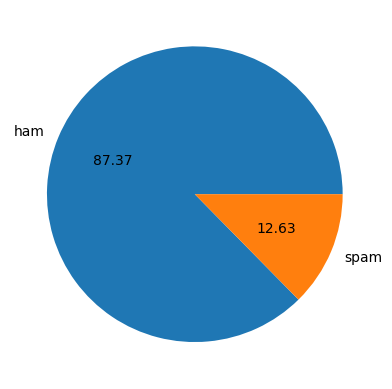

In [42]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [53]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wajiz.pk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\wajiz.pk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [54]:
df['num_characters'] = df['Text'].apply(len)

C:\Users\wajiz.pk\AppData\Local\Temp\ipykernel_13484\3954161518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [55]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [60]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [63]:
df["num_sentences"] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [65]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [66]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [69]:
#ham sms
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [70]:
#spam sms
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [83]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

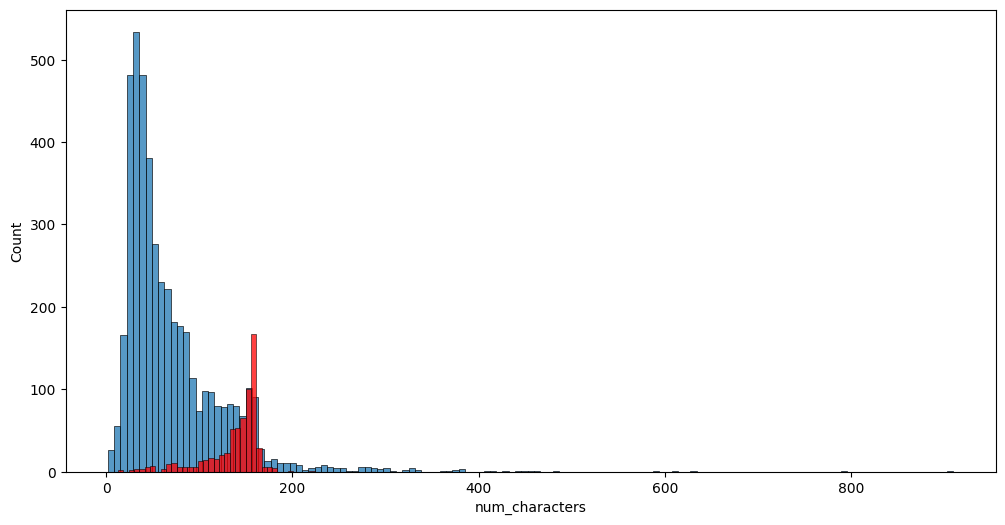

In [85]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')


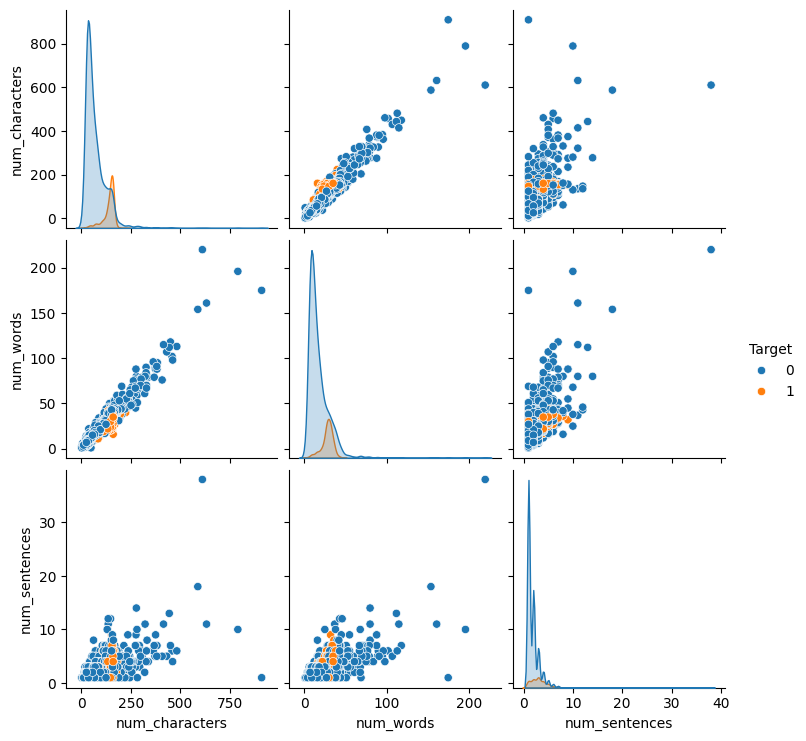

In [86]:
sns.pairplot(df,hue='Target')

Data Preprocessing

In [107]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return "  ".join(y)

In [109]:
transform_text('Hey how are you, im feeling horny TODAY wanna meet??')

'hey  im  feel  horni  today  wan  na  meet'

In [104]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [111]:
df['Transformed_text'] = df['Text'].apply(transform_text)

In [112]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [132]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [133]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))

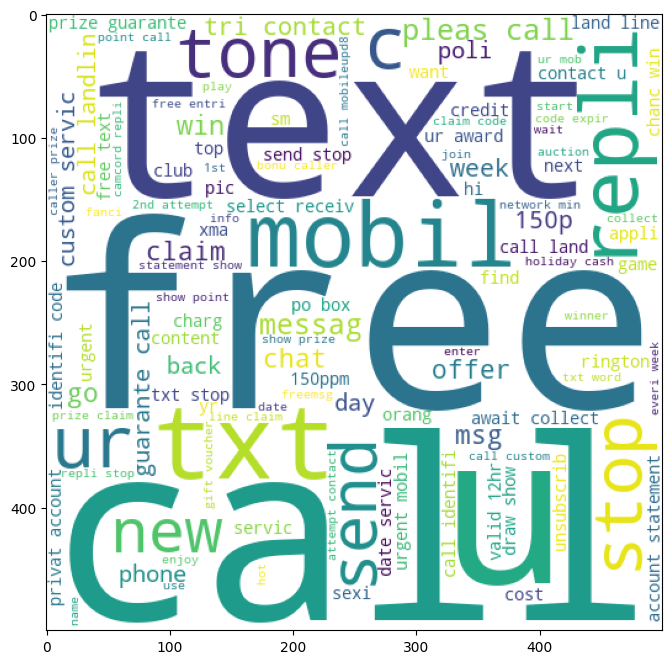

In [134]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [141]:
ham_wc = wc.generate(df[df["Target"] == 0] ['Transformed_text'].str.cat(sep=" "))

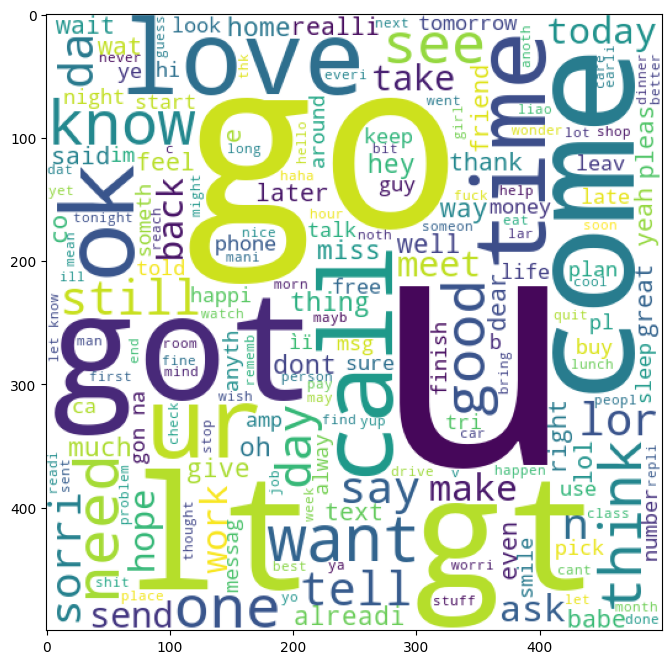

In [142]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [146]:
spam_corpus = []

for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [149]:
len(spam_corpus)

9939

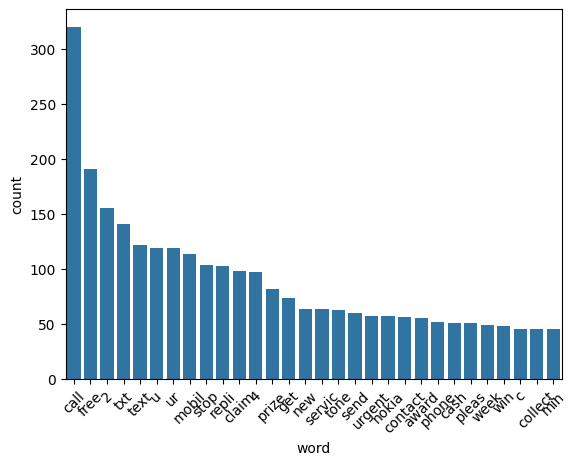

In [162]:
from collections import Counter
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), 
                          columns=['word', 'count'])

# Use named parameters
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation=45)  # Rotate x-labels for readability
plt.show()

Model Building

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [166]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [167]:
X.shape

(5169, 6708)

In [169]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [174]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [175]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [177]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [178]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [179]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [181]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))